<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
# Delete files if exist data inside 
from shutil import rmtree
import shutil

# Manejo de carpetas en el directorio

In [52]:
#Directorio actual
os.getcwd()

'/content'

In [65]:
# Listar archivos dentro de un directorio
os.listdir()

['kaggle.json', 'housedata.zip', 'data.dat', 'output.csv']

In [56]:
# Crear carpeta
os.mkdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [57]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [58]:
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [59]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [60]:
!kaggle datasets download -d shree1992/housedata

100% 432k/432k [00:00<00:00, 794kB/s]
100% 432k/432k [00:00<00:00, 792kB/s]


In [61]:
! unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [63]:
final_route = "/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/"
shutil.move("data.csv", final_route)

'/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/data.csv'

In [66]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/")

In [67]:
#Cambiar nombre de archivo
old_file = "data.csv"
new_file = "house_price_data.csv"
os.rename(old_file, new_file)

In [68]:
#Eliminar directorio
rmtree("HousePrice")

# Cargando dataset

In [69]:
pddf = pd.read_csv('/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/house_price_data.csv')
pddf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [70]:
#Creando algunas variables
pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
pddf['ant_built'] = pddf.year - pddf.yr_built
pddf['ant_renovated'] = pddf.year - pddf.yr_renovated.apply(lambda x: None if x==0 else x)

<Axes: >

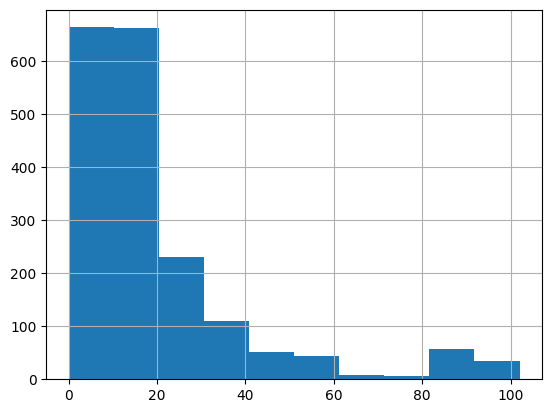

In [12]:
pddf.ant_renovated.hist()

In [43]:
target = 'price'

In [29]:
#Por el momento, sólo nos quedamos con variables numericas
pddf.select_dtypes(include='object').columns.tolist()

['date', 'street', 'city', 'statezip', 'country']

In [44]:
features = list(set(pddf.columns.tolist()) - set(['price','year','yr_built','yr_renovated']+pddf.select_dtypes(include='object').columns.tolist()))
data = pddf[features + [target]]

In [46]:
data.head()

,view,ant_built,sqft_above,ant_renovated,waterfront,bathrooms,sqft_basement,sqft_living,condition,floors,bedrooms,sqft_lot,price
0,0,59,1340,9.0,0,1.50,0,1340,3,1.5,3.0,7912,313000.0
1,4,93,3370,NaN,0,2.50,280,3650,5,2.0,5.0,9050,2384000.0
2,0,48,1930,NaN,0,2.00,0,1930,4,1.0,3.0,11947,342000.0
3,0,51,1000,NaN,0,2.25,1000,2000,4,1.0,3.0,8030,420000.0
4,0,38,1140,22.0,0,2.50,800,1940,4,1.0,4.0,10500,550000.0


# Seleccion de muestras